In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools, copy

In [2]:
roster = ['Austin Anderson',
          'Leo Hackbarth',
          'Aleksei Henning',
          'Ethan Jones',
          'Greyson Lee',
          'Graham Leone',
          'Will Murphy',
          'Sutton Nikels',
          'Ellis Propheter',
          'Owen Rolsky',
          'Ever Saulibio',
          'Jake Williamson',
          'Cy Camden']
weeks = 8


Generate a random combination for every week

In [5]:
def generate_random_teams(roster,weeks):
    team1_rosters = {}
    team2_rosters = {}
    for week in np.arange(weeks):
        player_ids = np.arange(np.shape(roster)[0]).tolist()
        t1=[]
        while len(t1) < 6:
            index = np.random.randint(np.shape(roster)[0])
            if index in player_ids:
                t1.extend([index])
                player_ids.remove(index)
        team1_rosters['week'+str(week+1)] = t1 
        team2_rosters['week'+str(week+1)] = player_ids
    return team1_rosters,team2_rosters

In [6]:
team1_rosters,team2_rosters = generate_random_teams(roster,weeks)

In [7]:
def count_pairs(team1_rosters,team2_rosters):
    pairs = np.zeros((np.shape(roster)[0],np.shape(roster)[0]))
    for week in np.arange(weeks):
        for kid1,kid2 in list(itertools.combinations(list(team1_rosters.values())[week], 2)):
            if kid1<kid2:pairs[kid1,kid2] +=1
            else:pairs[kid2,kid1] +=1
        for kid1,kid2 in list(itertools.combinations(list(team2_rosters.values())[week], 2)):
            if kid1<kid2:pairs[kid1,kid2] +=1
            else:pairs[kid2,kid1] +=1
    pairs[pairs==0.]=np.nan
    return pairs
pairs = count_pairs(team1_rosters,team2_rosters)


Check how many times each kid plays with each other kid

### _brute force_
Generate random teams for all weeks until each kid plays with each other kid 3/8 times minumum. <br>
While doing this, save all of the rosters that are closer to all kids playing with each other exactly 4 times the we've previously gotten

In [ ]:
best = np.min(pairs[~np.isnan(pairs)])
maxi = np.max(pairs[~np.isnan(pairs)])
uniformity = 100000
i=0
parities,mins,maxes,teams = [],[],[],[]

while best < 2.2:
    i+=1
    team1_rosters,team2_rosters = generate_random_teams(roster,weeks)
    pairs = count_pairs(team1_rosters,team2_rosters)

    if np.sum(np.abs(np.sort(pairs[~np.isnan(pairs)].tolist()) - 4)) < uniformity:
        best = np.min(pairs[~np.isnan(pairs)]);mins.extend([best])
        maxi = np.max(pairs[~np.isnan(pairs)]);maxes.extend([maxi])
        uniformity=np.sum(np.abs(np.sort(pairs[~np.isnan(pairs)].tolist()) - 4))
        final_rosters=[team1_rosters,team2_rosters]
        parities.extend([np.sum(np.abs(np.sort(pairs[~np.isnan(pairs)].tolist()) - 4))])
        teams.extend([final_rosters])
    print('attempt '+str(i)+' least number of games for any pair: '+str(best)+' most number of games for any pair: '+str(maxi)+' number of 5 combos: '+str(pairs[~np.isnan(pairs)].tolist().count(5.))+' best uniformity: '+str(uniformity), end="\r"),
    # print('most number of games for any pair: '+str(np.max(pairs[~np.isnan(pairs)])))
    # print('...trying again...')

## _brute force with a bit more care, but still pretty brutal_
Check to make sure that every kid plays with every other kid, and then try to make every kid play with every other kid as close to 4 times as we can. Two stages:
1. randomly generate combinations for all games, keeping those that get closer to uniform (every kid plays with every kid 5 times).
2. once were close to this, start flipping random pairs of kids in random weeks one at a time and keep the flip only if it gets is closer to uniform

keep doing this, keeping every version that gets is closed. if we get to every kid playing together at least 4 times, quit and call it a success! othewise we keep going forever until we manually stop and see the best results 


In [8]:
mini = 2.
unis = [10000]
rosters = [None]
while mini < 3.2:

    best = np.min(pairs[~np.isnan(pairs)])
    maxi = np.max(pairs[~np.isnan(pairs)])
    uniformity = 100000
    i=0
    parities,mins,maxes,teams = [],[],[],[]

    while uniformity > 60.1:
        i+=1
        team1_rosters,team2_rosters = generate_random_teams(roster,weeks)
        pairs = count_pairs(team1_rosters,team2_rosters)

        if np.sum(np.abs(np.sort(pairs[~np.isnan(pairs)].tolist()) - 4)) < uniformity:
            best = np.min(pairs[~np.isnan(pairs)]);mins.extend([best])
            maxi = np.max(pairs[~np.isnan(pairs)]);maxes.extend([maxi])
            uniformity=np.sum(np.abs(np.sort(pairs[~np.isnan(pairs)].tolist()) - 4))
            final_rosters=[team1_rosters,team2_rosters]
            parities.extend([np.sum(np.abs(np.sort(pairs[~np.isnan(pairs)].tolist()) - 4))])
            teams.extend([final_rosters])
        print('attempt '+str(i)+' least number of games for any pair: '+str(best)+' most number of games for any pair: '+str(maxi)+' number of 5 combos: '+str(pairs[~np.isnan(pairs)].tolist().count(5.))+' best uniformity: '+str(uniformity), end="\r"),
        # print('most number of games for any pair: '+str(np.max(pairs[~np.isnan(pairs)])))
        # print('...trying again...')

    i=0
    while i<10000:
        i+=1
        pairs_in = count_pairs(team1_rosters,team2_rosters)
        uni_in   = np.sum(np.abs(np.sort(pairs_in[~np.isnan(pairs_in)].tolist()) - 4))

        #swap two random players in a random week
        week = np.random.randint(weeks)
        player_from_1 = team1_rosters['week'+str(week+1)][np.random.randint(np.shape(team1_rosters['week'+str(week+1)]))[0]]
        player_from_2 = team2_rosters['week'+str(week+1)][np.random.randint(np.shape(team2_rosters['week'+str(week+1)]))[0]]
        
        
        _team1_rosters=copy.deepcopy(team1_rosters)
        _team2_rosters=copy.deepcopy(team2_rosters)
        _team1_rosters['week'+str(week+1)].remove(player_from_1)
        _team1_rosters['week'+str(week+1)].extend([player_from_2])
        _team2_rosters['week'+str(week+1)].remove(player_from_2)
        _team2_rosters['week'+str(week+1)].extend([player_from_1])

        #check if this made it better, if so, return the new rosters, if not return the inputs
        pairs_new = count_pairs(_team1_rosters,_team2_rosters)
        uni_new   = np.sum(np.abs(np.sort(pairs_new[~np.isnan(pairs_new)].tolist()) - 4))
        if uni_new < uni_in:
            # plt.imshow(pairs_new,clim=(0,8))
            # plt.colorbar()
            print(str(i)+'   uni_in'+str(uni_in)+'   uniformity: '+str(uni_new),end="\r")
            team1_rosters = dict(_team1_rosters)
            team2_rosters = dict(_team2_rosters)


    pairs = count_pairs(team1_rosters,team2_rosters)
    final_rosters = (team1_rosters,team2_rosters)
    
    #if we have a new minimum for uniformity, keep it
    if np.shape(pairs[~np.isnan(pairs)])[0] > 77: #make sure every kid plays at some point (there are 78 combinations)
        if np.sum(np.abs(np.sort(pairs_new[~np.isnan(pairs_new)].tolist()) - 4)) < np.min(unis):
            unis.extend([np.sum(np.abs(np.sort(pairs_new[~np.isnan(pairs_new)].tolist()) - 4))])
            rosters.extend([final_rosters])
            print('new best uniformity: '+str(uniformity))

        mini = np.min(np.sort(pairs[~np.isnan(pairs)].tolist()))#break if we made it to everybody plays 4 times

new best uniformity: 58.0ity: 48.0 for any pair: 1.0 most number of games for any pair: 6.0 number of 5 combos: 7 best uniformity: 58.00


KeyboardInterrupt: 

In [9]:
good_roster = copy.deepcopy(rosters[-1])
pairs = count_pairs(good_roster[0],good_roster[1])


In [10]:
good_roster2 = copy.deepcopy(good_roster)

# check the results and make the schedule

### pairs
- show all of the pairwise combinations (one kid playing with another)
- ideally, this shuold be a uniform triangle, with all kids playing with each the same number of times.
- in this color scheme, turquoise (=4) is good

In [11]:
np.random.shuffle(roster)
final_rosters_team1 = {}
final_rosters_team2 = {}
for week in final_rosters[0]:
    final_rosters_team1[week]=np.array(roster)[good_roster[0][week]]
    final_rosters_team2[week]=np.array(roster)[good_roster[1][week]]

In [28]:
# roster
roster = ['Jake Williamson',
 'Greyson Lee',
 'Leo Hackbarth',
 'Graham Leone',
 'Sutton Nikels',
          'Will Murphy',
 'Ethan Jones', 
 'Aleksei Henning',
 'Austin Anderson',
 'Cy Camden',
 'Ellis Propheter',
 'Ever Saulibio',
 'Owen Rolsky',
]

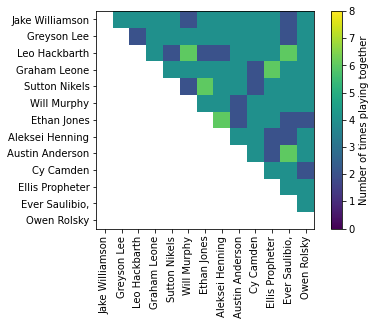

In [27]:
plt.imshow(pairs,clim=(0,8))
plt.colorbar(label='Number of times playing together')
np.sum(np.abs(np.sort(pairs[~np.isnan(pairs)].tolist()) - 5))
np.sort(pairs[~np.isnan(pairs)].tolist())
plt.gca().set_yticks(np.arange(np.shape(roster)[0]));
plt.gca().set_yticklabels(roster)
plt.gca().set_xticks(np.arange(np.shape(roster)[0]));
dump=plt.gca().set_xticklabels(roster,rotation='vertical')

In [44]:
team1_loc = ['Sep 10 12:30PM Field 1F',
             'Sep 17 10:10AM Field 1F',
             'Oct 1. 09:00AM Field 1C',
             'Oct 2  10:10AM Field 1C',
             'Oct 8  09:00AM Field 1C',
             'Oct 15 12:30PM Field 1F',
             'Oct 22 01:40PM Field 1A',
             'Oct 29 02:50PM Field 1A',
            ]
team2_loc = ['Sep 10 11:20PM Field 1F',
             'Sep 17 09:00AM Field 1F',
             'Oct 1. 10:10AM Field 1C',
             'Oct 2  11:20AM Field 1C',
             'Oct 8  10:10AM Field 1C',
             'Oct 15 01:40PM Field 1F',
             'Oct 22 02:50PM Field 1A',
             'Oct 29 01:40PM Field 1A',
            ]
team1_HA = ['Away','Home','Away','Home','Away','Home','Home','Away'] #TBD
team2_HA = ['Home','Home','Away','Away','Away','Home','Home','Home'] #TBD
colors = {'Home':'maroon','Away':'white'}

In [45]:
def plot_rosters(week):
    fig, ax = plt.subplots(frameon=False)

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5,edgecolor=colors[team1_HA[int(week[-1])-1]])

    # place a text box in upper left in axes coords
    ax.text(0.1, 0.95, 'team gold', transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax.text(0.1, 0.85, ' '.join(team1_loc[int(week[-1])-1].split(' ')[2:]), transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax.text(0.1, 0.75,team1_HA[int(week[-1])-1]+' jersey: '+colors[team1_HA[int(week[-1])-1]], transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
    for i,player in enumerate(final_rosters_team1[week]):
#         props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.1, 0.7-(i+1)*0.11, player, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='purple', alpha=0.5,edgecolor=colors[team2_HA[int(week[-1])-1]])

    # place a text box in upper left in axes coords
    ax.text(0.65, 0.95, 'team purple', transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax.text(0.65, 0.85,' '.join(team2_loc[int(week[-1])-1].split(' ')[2:]), transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax.text(0.65, 0.75,team2_HA[int(week[-1])-1]+' jersey: '+colors[team2_HA[int(week[-1])-1]], transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    for i,player in enumerate(final_rosters_team2[week]):
#         props = dict(boxstyle='round', facecolor='purple', alpha=0.5)
        ax.text(0.65, 0.7-(i+1)*0.11, player, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    plt.title(week+' '+' '.join(team1_loc[int(week[-1])-1].split(' ')[:2]),fontsize = 20)
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    plt.gca().axis('off')
    plt.tight_layout()
    return plt.gcf()

def plot_for_player(player,weeks):
    fig, ax = plt.subplots(frameon=False)
    for week in np.arange(weeks):
        day = ' '.join(team1_loc[week].split(' ')[:2])
        if player in final_rosters_team1['week'+str(week+1)]:
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            loc = ' '.join(team1_loc[week].split(' ')[2:])+' jersey: '+colors[team1_HA[week]]
        else:
            props = dict(boxstyle='round', facecolor='purple', alpha=0.5)
            loc = ' '.join(team2_loc[week].split(' ')[2:])+' jersey: '+colors[team2_HA[week]]


        ax.text(0.1, 0.99-(week+1)*0.11, day+'  '+loc, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
        
    plt.title(player,fontsize = 20)
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    plt.gca().axis('off')
    plt.tight_layout()
    return plt.gcf()

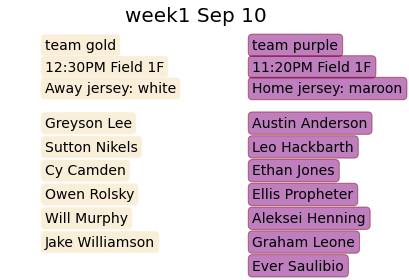

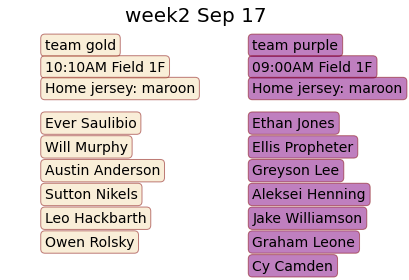

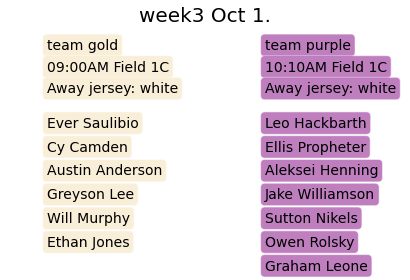

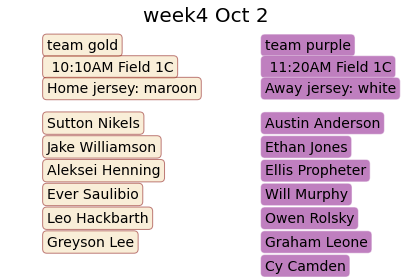

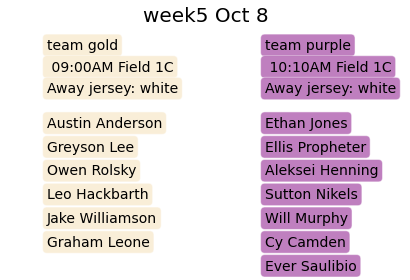

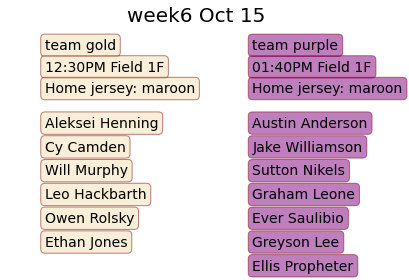

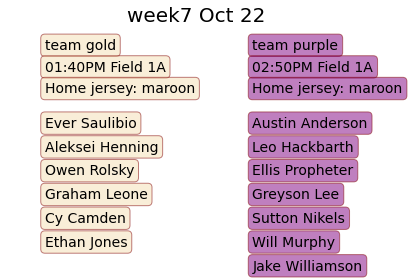

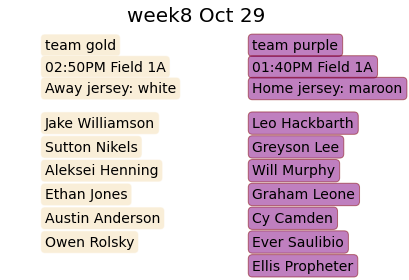

In [46]:
for week in np.arange(weeks):
    p = plot_rosters('week'+str(week+1))
    p.savefig('/Users/danieljdenman/Desktop/week'+str(week+1)+'.png')

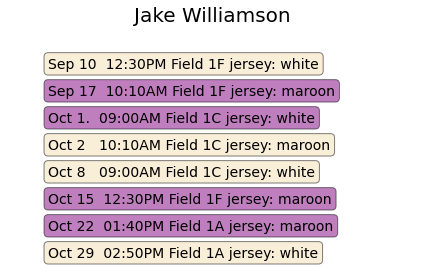

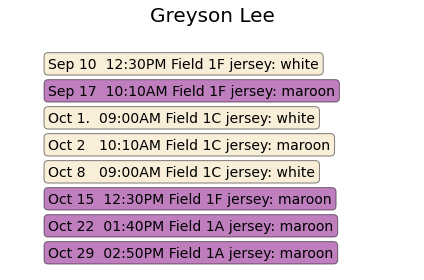

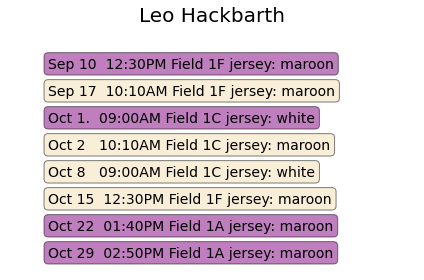

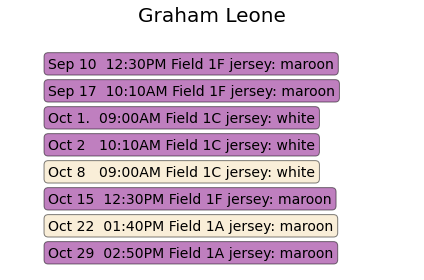

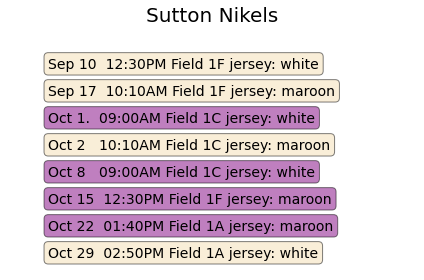

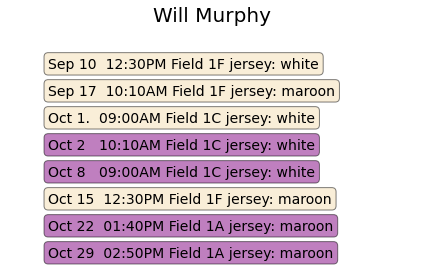

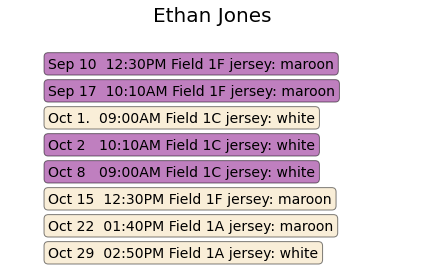

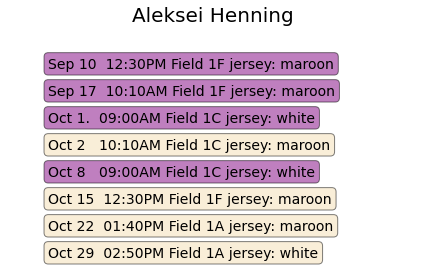

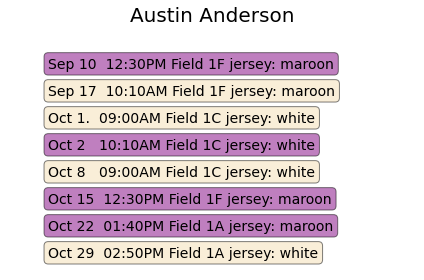

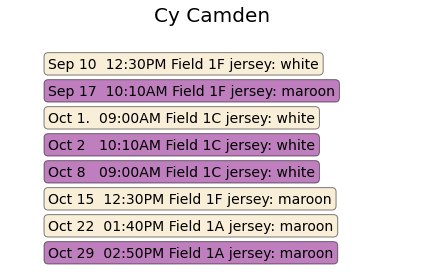

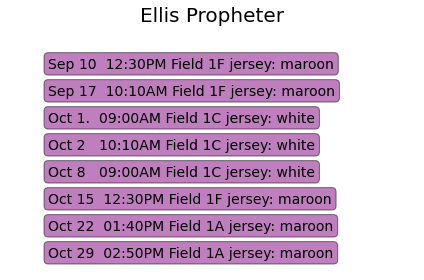

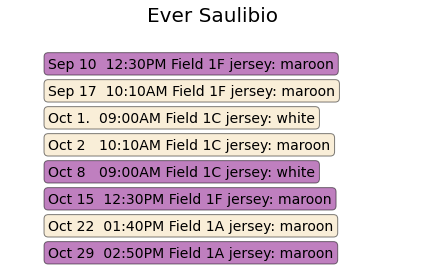

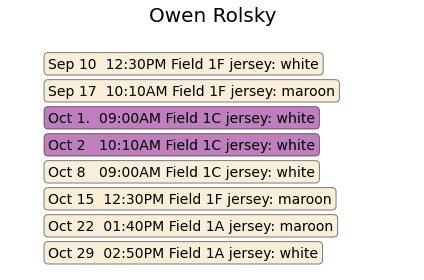

In [43]:
for player in roster:
    p=plot_for_player(player,weeks)
    p.savefig('/Users/danieljdenman/Desktop/'+player+'.png')

In [36]:
def swap_unevens(team1_rosters,team2_rosters):

    swapped=False
    pairs_in = count_pairs(team1_rosters,team2_rosters)
    uni_in   = np.sum(np.abs(np.sort(pairs_in[~np.isnan(pairs_in)].tolist()) - 4))

    player = np.random.randint(np.shape(roster)[0])
    combos   =np.hstack((pairs_in[player,:],pairs_in[:,player]))[~np.isnan(np.hstack((pairs_in[player,:],pairs_in[:,player])))]
    combo_id =np.where(~np.isnan(np.hstack((pairs_in[player,:],pairs_in[:,player]))))[0]%13
    overs = combo_id[np.where(combos > 4.)[0]]
    unders =combo_id[np.where(combos < 4.)[0]]
    if np.shape(overs)[0] < 1. or np.shape(unders)[0]<1.:
        pass#we have no overs or unders, this player plays with everyone evenly
    else:
        #swap two mismatched players 
        _team1_rosters=copy.deepcopy(team1_rosters)
        _team2_rosters=copy.deepcopy(team2_rosters)

        for week in np.arange(weeks):
            con=True
            if player in team1_rosters['week'+str(week+1)]:
                for over in overs:
                    if con:
                        for under in unders:
                            if over in team1_rosters['week'+str(week+1)] and under not in team1_rosters['week'+str(week+1)]:
#                                 print(player)
#                                 print(over)
#                                 print(under)
#                                 print(_team1_rosters['week'+str(week+1)])
                                try:
                                    con=False
                                    _team1_rosters['week'+str(week+1)].remove(over)
                                    _team1_rosters['week'+str(week+1)].extend([under])
                                    _team2_rosters['week'+str(week+1)].remove(under)
                                    _team2_rosters['week'+str(week+1)].extend([over])
                                except:pass
            if player in team2_rosters['week'+str(week+1)]:
                for over in overs:
                    if con:
                        for under in unders:
                            if over in team2_rosters['week'+str(week+1)] and under not in team2_rosters['week'+str(week+1)]:
                                try:
                                    con=False
                                    _team1_rosters['week'+str(week+1)].remove(under)
                                    _team1_rosters['week'+str(week+1)].extend([over])
                                    _team2_rosters['week'+str(week+1)].remove(over)
                                    _team2_rosters['week'+str(week+1)].extend([under]) 
                                except:
                                    pass



        #check if this made it better, if so, return the new rosters, if not return the inputs
        pairs_new = count_pairs(_team1_rosters,_team2_rosters)
        uni_new   = np.sum(np.abs(np.sort(pairs_new[~np.isnan(pairs_new)].tolist()) - 4))
        if uni_new < uni_in:
            # plt.imshow(pairs_new,clim=(0,8))
            # plt.colorbar()
            print('swap')
            print(str(i)+'   uni_in'+str(uni_in)+'   uniformity: '+str(uni_new),end="\r")
            team1_rosters = dict(_team1_rosters)
            team2_rosters = dict(_team2_rosters)
            swapped=True

    return swapped,team1_rosters,team2_rosters

# pairs = count_pairs(team1_rosters,team2_rosters)
# final_rosters = (team1_rosters,team2_rosters)